# Bootcamp Data Science Aplicada - Alura

# Módulo 3 - Análise e Previsão de Séries Temporais

Notebook para o acompanhamento das aulas e resoluções dos desafios propostos. Caso necessário, dividirei em mais de um notebook.

## Importação das Bibliotecas

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pandas.plotting import autocorrelation_plot

import warnings
warnings.filterwarnings('ignore')

# Aula 01 - Entendendo a Série Temporal

In [2]:
dados = pd.read_csv('../data/dados_covid_sp.csv', sep = ';')

In [3]:
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [4]:
# sns.lineplot(x = 'datahora', y = 'casos', data = dados)

In [5]:
dados['datahora'] = pd.to_datetime(dados['datahora'], format = '%Y-%m-%d')

- https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

<AxesSubplot:xlabel='datahora', ylabel='casos'>

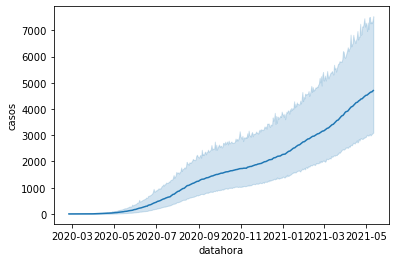

In [6]:
sns.lineplot(x = 'datahora', y = 'casos', data = dados)

In [7]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15, 8)

In [8]:
eixo_x = np.linspace(-2, 2, 100)

In [9]:
y_exp = np.exp(eixo_x)

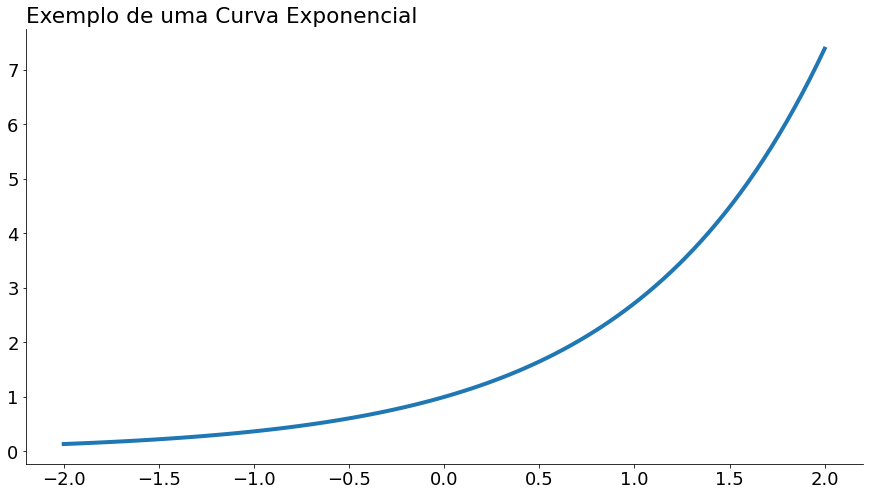

In [10]:
sns.lineplot(x = eixo_x, y = y_exp, linewidth = 4)
plt.title('Exemplo de uma Curva Exponencial', loc = 'left')
sns.despine()
plt.show()

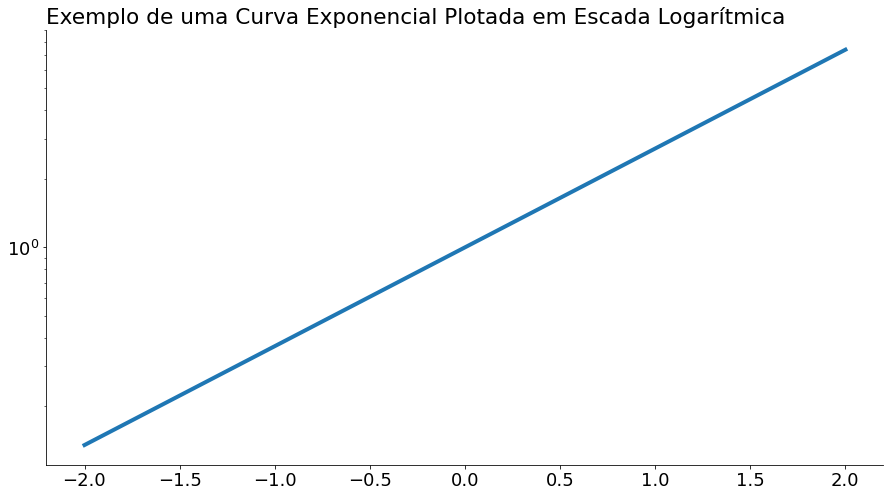

In [11]:
sns.lineplot(x = eixo_x, y = y_exp, linewidth = 4)
plt.yscale('log')
plt.title('Exemplo de uma Curva Exponencial Plotada em Escada Logarítmica', loc = 'left')
sns.despine()
plt.show()

In [12]:
dados_sp = dados.query('nome_munic == "São Paulo"')

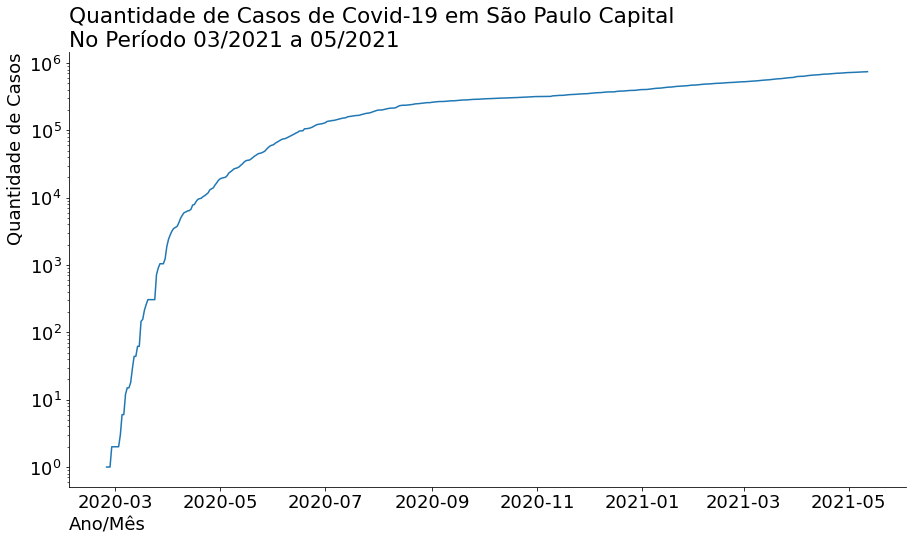

In [13]:
sns.lineplot(x = 'datahora', y = 'casos', data = dados_sp)
plt.yscale('log') # escala logarítmica
plt.title('Quantidade de Casos de Covid-19 em São Paulo Capital\nNo Período 03/2021 a 05/2021', loc = 'left')
plt.xlabel('Ano/Mês', loc = 'left')
plt.ylabel('Quantidade de Casos', loc = 'top')
sns.despine()
plt.show()

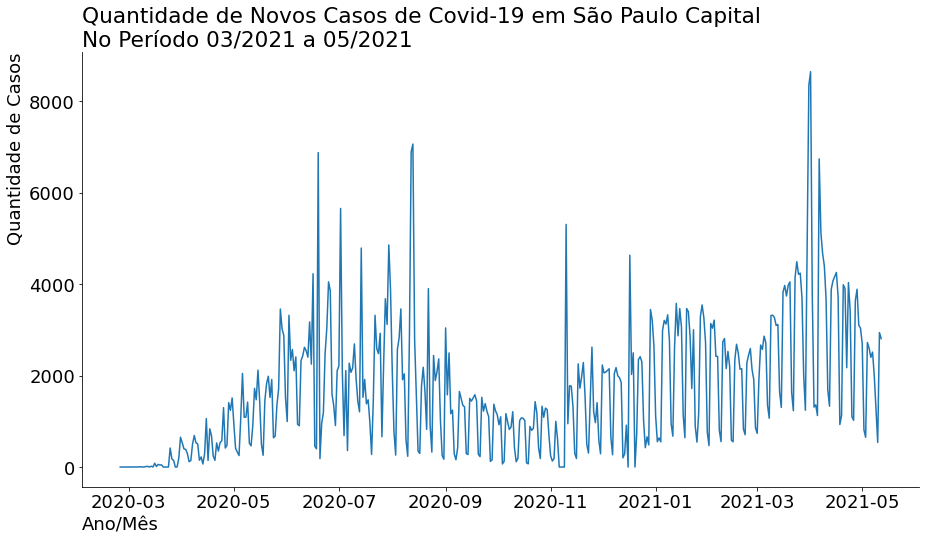

In [14]:
sns.lineplot(x = 'datahora', y = 'casos_novos', data = dados_sp)
plt.title('Quantidade de Novos Casos de Covid-19 em São Paulo Capital\nNo Período 03/2021 a 05/2021', loc = 'left')
plt.xlabel('Ano/Mês', loc = 'left')
plt.ylabel('Quantidade de Casos', loc = 'top')
sns.despine()
plt.show()

In [15]:
dados_exemplo = pd.DataFrame(data = np.linspace(1, 10, 10))

In [16]:
dados_exemplo.head()

,0
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


In [17]:
dados_exemplo.columns = ['coluna1']

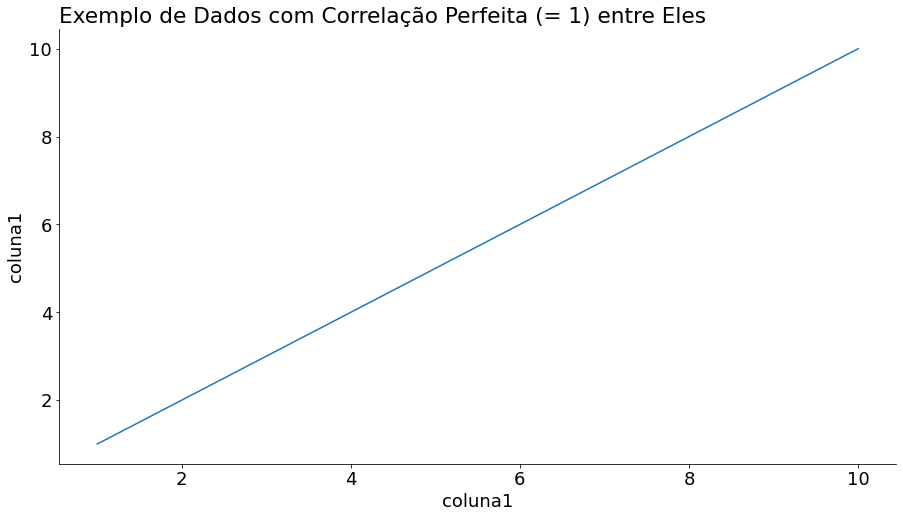

In [18]:
sns.lineplot(x = 'coluna1', y = 'coluna1', data = dados_exemplo)
plt.title('Exemplo de Dados com Correlação Perfeita (= 1) entre Eles', loc = 'left')
sns.despine()
plt.show()

In [19]:
dados_exemplo['diferenciado'] = dados_exemplo.diff()

In [20]:
dados_exemplo

,coluna1,diferenciado
0,1.0,NaN
1,2.0,1.0
2,3.0,1.0
3,4.0,1.0
4,5.0,1.0
5,6.0,1.0
6,7.0,1.0
7,8.0,1.0
8,9.0,1.0
9,10.0,1.0


<AxesSubplot:xlabel='coluna1', ylabel='coluna1'>

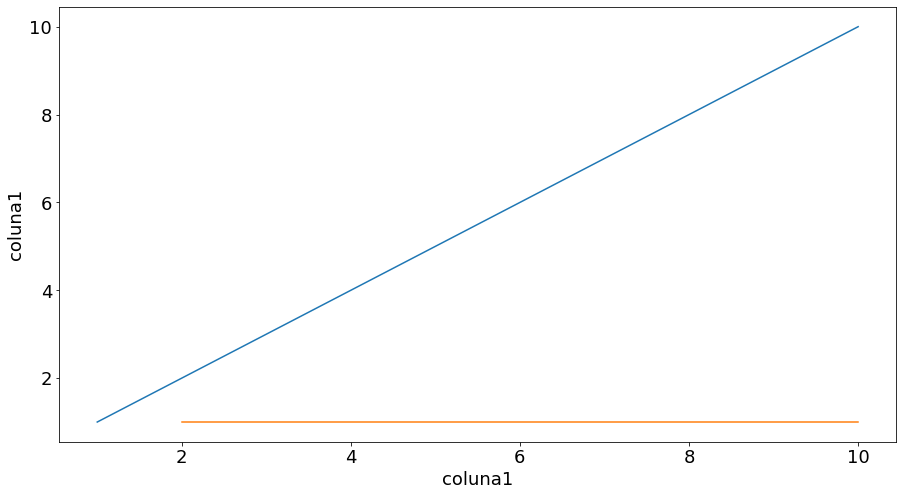

In [21]:
sns.lineplot(x = 'coluna1', y = 'coluna1', data = dados_exemplo)
sns.lineplot(x = 'coluna1', y = 'diferenciado', data = dados_exemplo)

In [22]:
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

<AxesSubplot:xlabel='datahora', ylabel='taxa_de_crescimento_casos'>

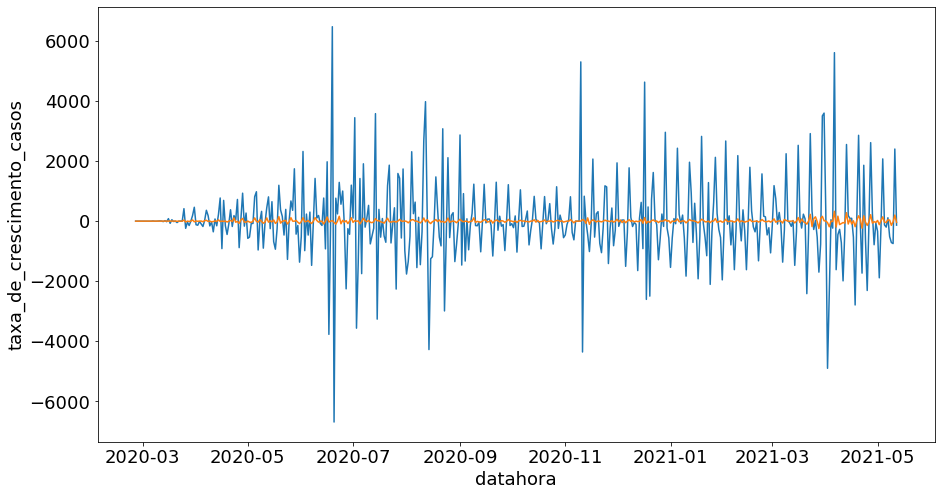

In [23]:
sns.lineplot(x = 'datahora', y = 'taxa_de_crescimento_casos', data = dados_sp)
sns.lineplot(x = 'datahora', y = 'taxa_de_crescimento_obitos', data = dados_sp)

<AxesSubplot:xlabel='datahora', ylabel='taxa_de_crescimento_obitos'>

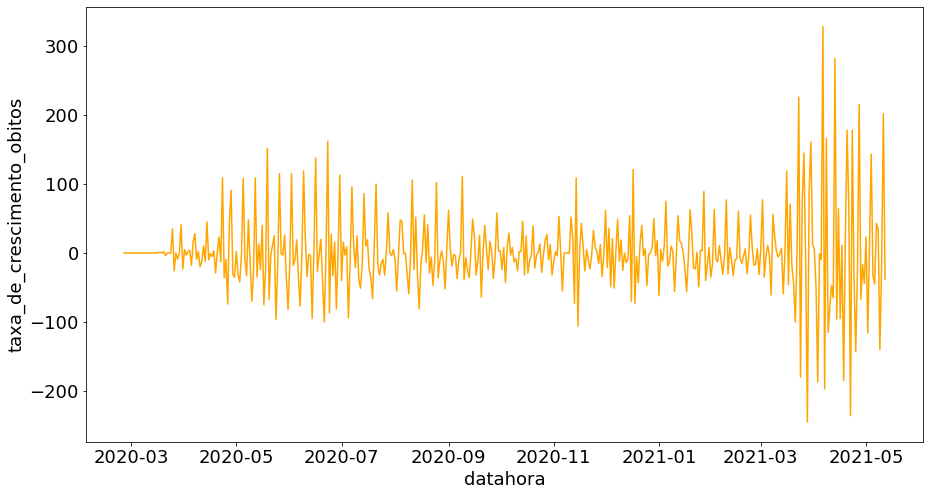

In [24]:
sns.lineplot(x = 'datahora', y = 'taxa_de_crescimento_obitos', data = dados_sp, color = 'orange')

<BarContainer object of 443 artists>

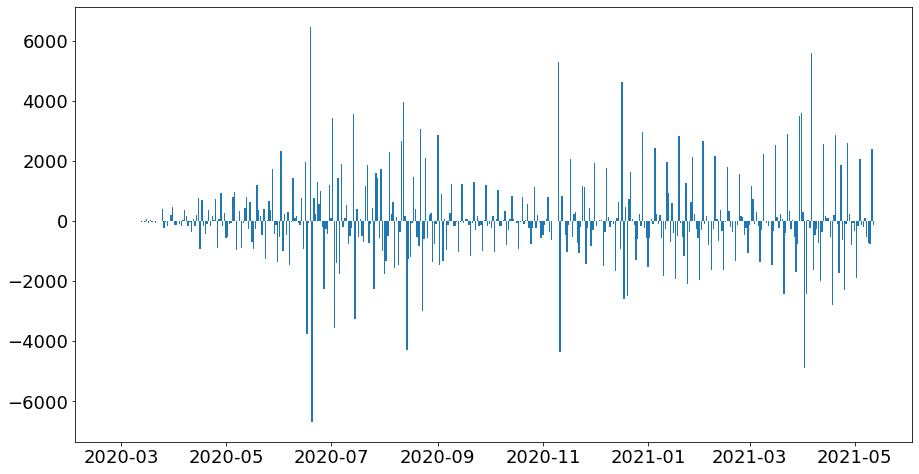

In [25]:
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_crescimento_casos'])

In [26]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year

In [27]:
dados_2021 = dados_sp.query('ano == 2021')

<BarContainer object of 132 artists>

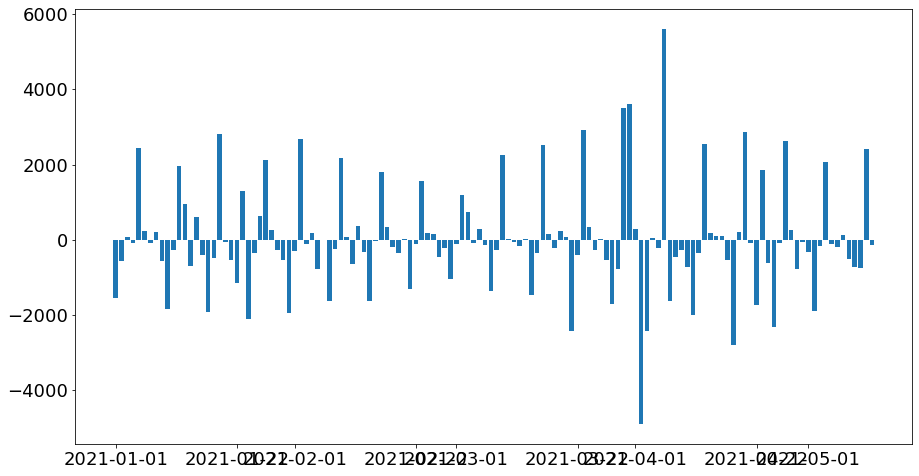

In [28]:
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'])

In [29]:
# média móvel
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window = 7, center = False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window = 7, center = False).mean()

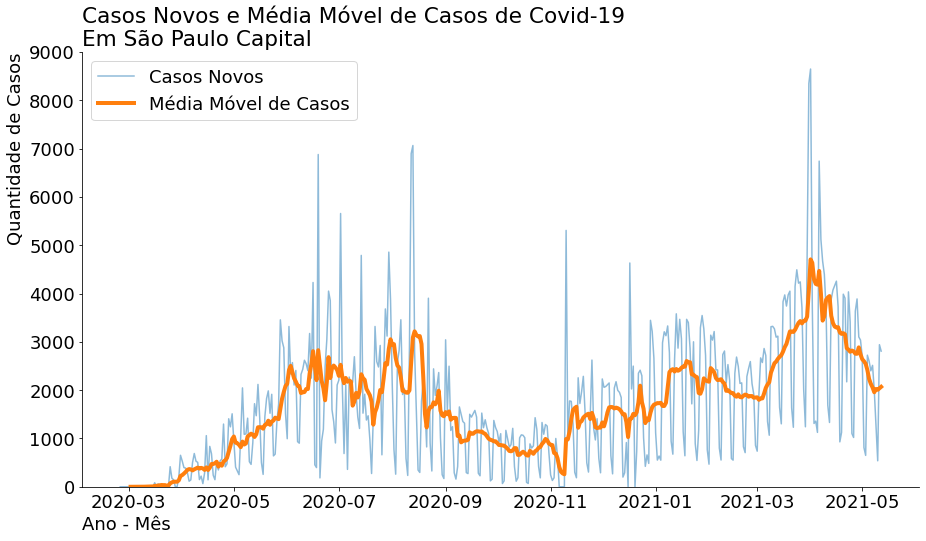

In [53]:
sns.lineplot(x = 'datahora', y = 'casos_novos', data = dados_sp, alpha = 0.5, linewidth = 1.5, label = 'Casos Novos')
sns.lineplot(x = 'datahora', y = 'media_movel_casos', data = dados_sp, linewidth = 4, label = 'Média Móvel de Casos')
plt.title('Casos Novos e Média Móvel de Casos de Covid-19\nEm São Paulo Capital', loc = 'left')
sns.despine()
plt.xlabel('Ano - Mês', loc = 'left')
plt.ylabel('Quantidade de Casos', loc = 'top')
plt.ylim(0, 9000)
plt.legend()
plt.show()

<AxesSubplot:xlabel='casos_novos', ylabel='obitos_novos'>

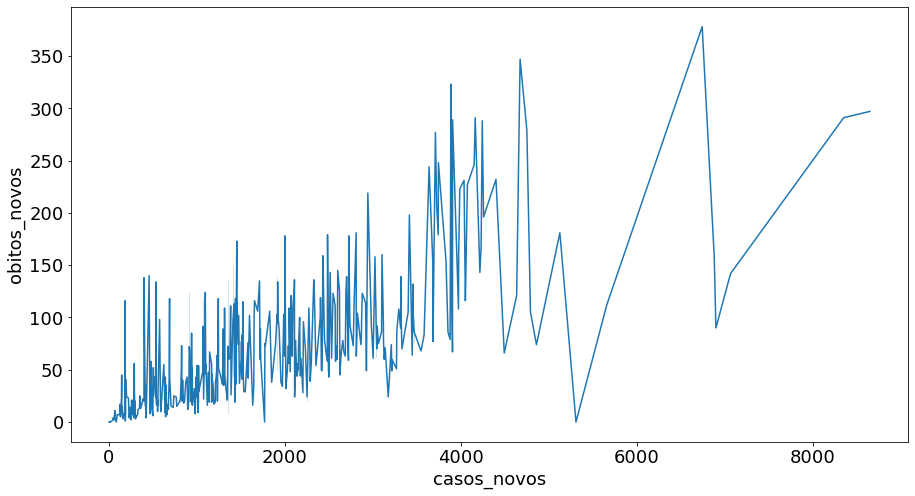

In [31]:
sns.lineplot(x = 'casos_novos', y = 'obitos_novos', data = dados_sp)

In [32]:
dados_202101 = dados_sp.query('mes == 1 & ano == 2021')
dados_202102 = dados_sp.query('mes == 2 & ano == 2021')

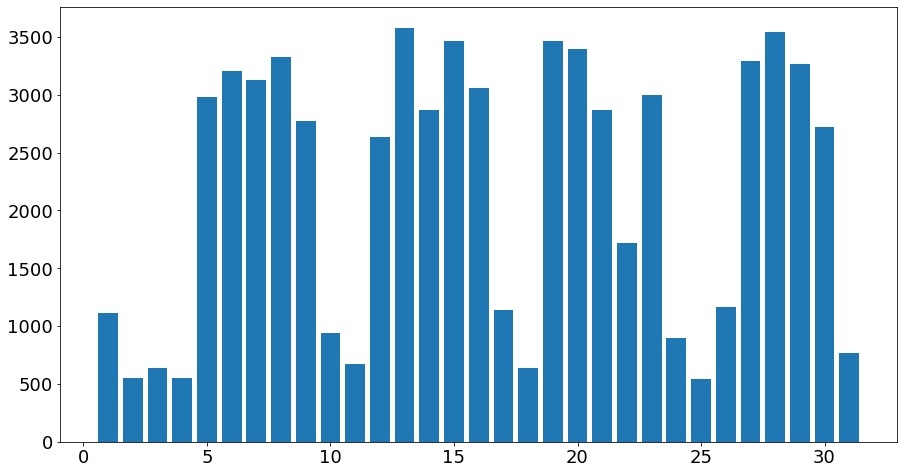

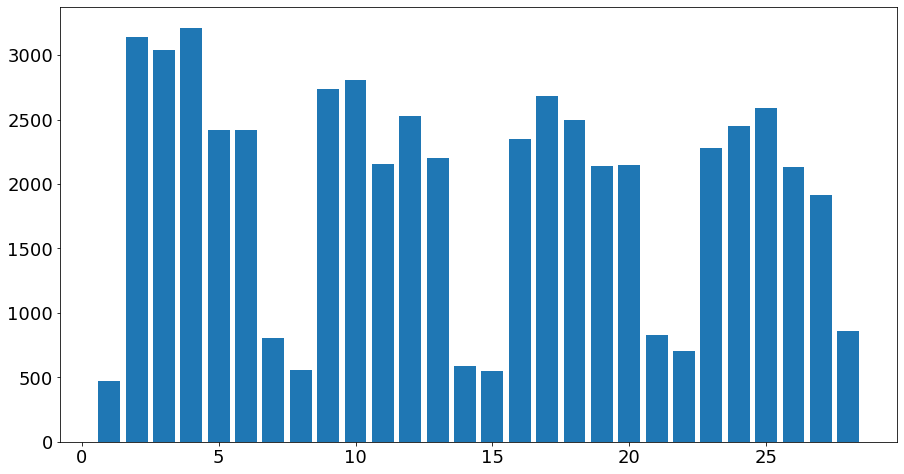

In [33]:
plt.bar(np.linspace(1, 31, 31), dados_202101['casos_novos'])
plt.show()
plt.bar(np.linspace(1, 28, 28), dados_202102['casos_novos'])
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

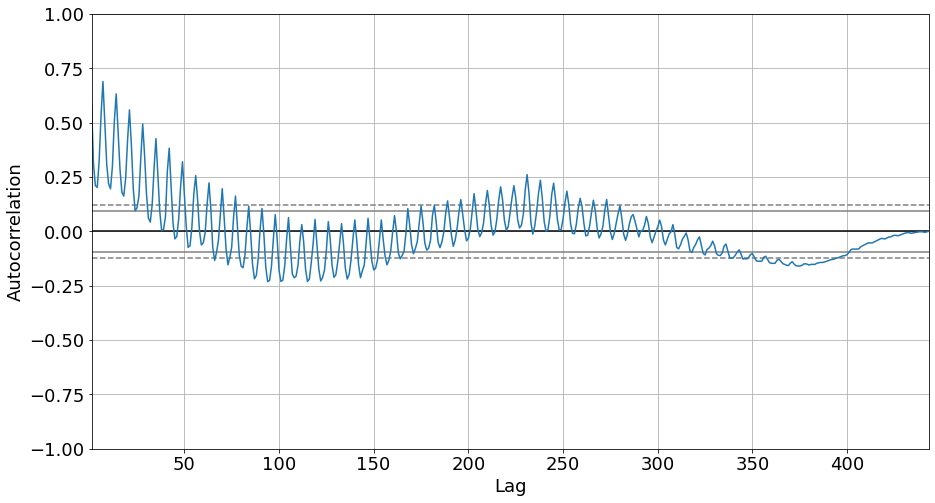

In [34]:
autocorrelation_plot(dados_sp['casos_novos'])

In [35]:
dados_sp.shape

(443, 31)

In [36]:
aleatorio = np.random.rand(443)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

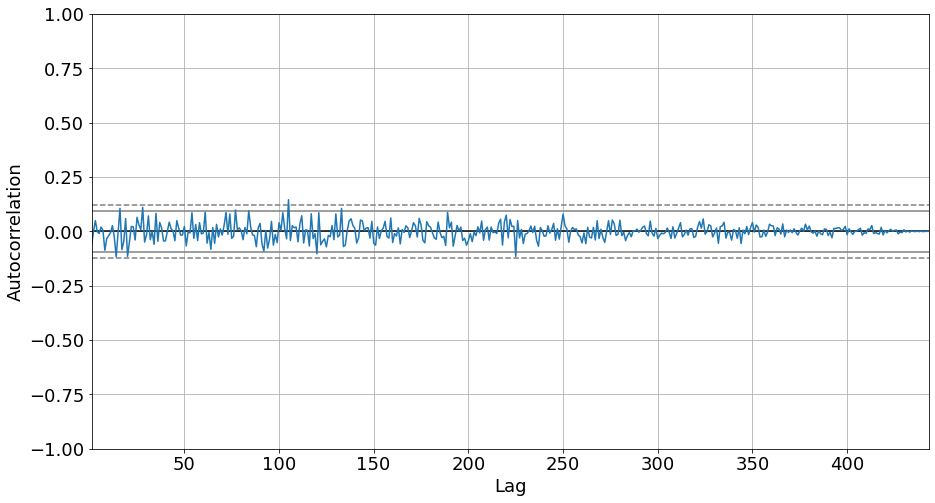

In [37]:
autocorrelation_plot(aleatorio)

# Desafio 01: Um notebook sem warnings

Para isso utilizamos:

```python
import warnings # importamos a bibioteca warnings
warnings.filterwarnings('ignore') # ignoramos os warnings
```

# Desafio 02: Pico taxa de casos novos coincide com taxa dos óbitos novos.

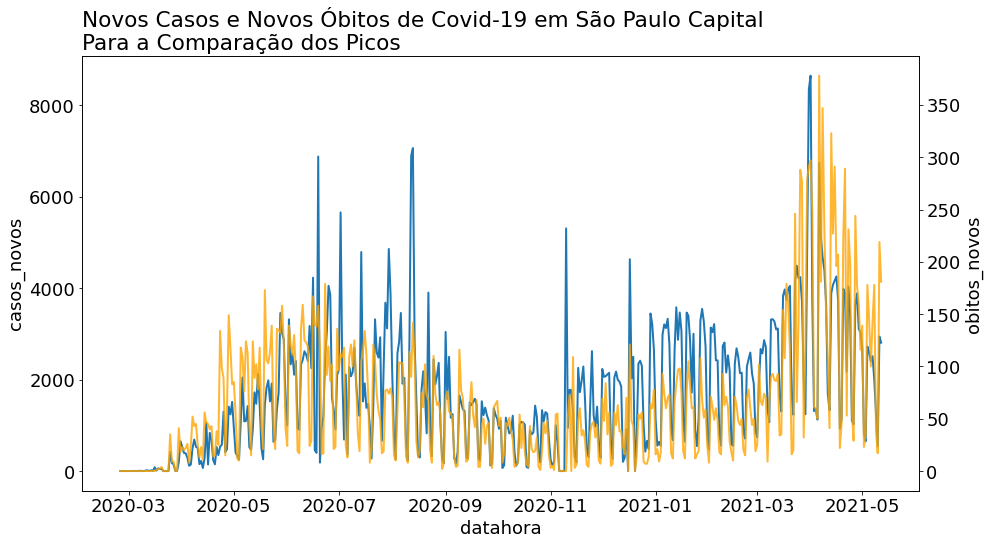

In [109]:
ax1 = sns.lineplot(x = 'datahora', y = 'casos_novos', data = dados_sp, linewidth = 2)
ax2 = ax1.twinx()
ax2 = sns.lineplot(x = 'datahora', y = 'obitos_novos', data = dados_sp, color = 'orange', linewidth = 2, alpha = 0.8)
plt.title('Novos Casos e Novos Óbitos de Covid-19 em São Paulo Capital\nPara a Comparação dos Picos', loc = 'left')
plt.show()

É um gráfico meio "lotado", mas dá pra enxergar que os picos dos dados não coincidem.

In [38]:
dados_202008 = dados_sp.query('mes == 8 & ano == 2020')
dados_202009 = dados_sp.query('mes == 9 & ano == 2020')

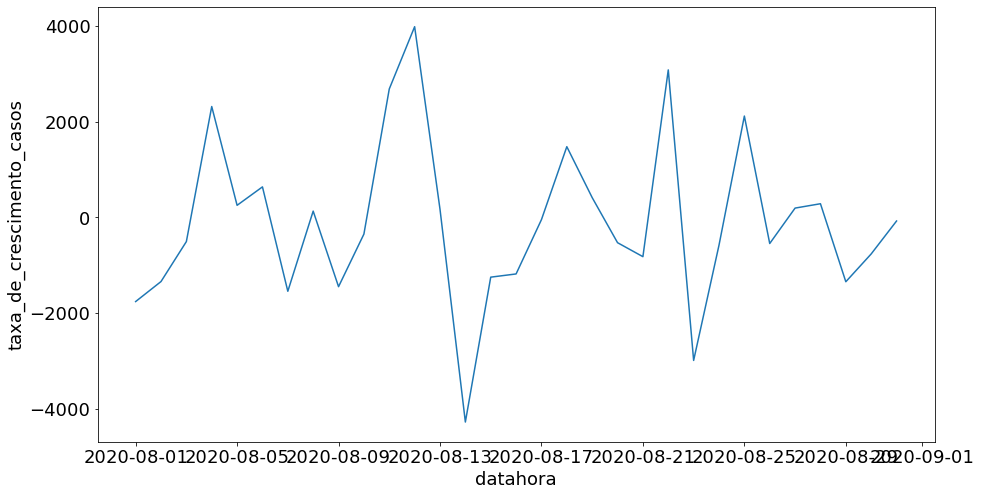

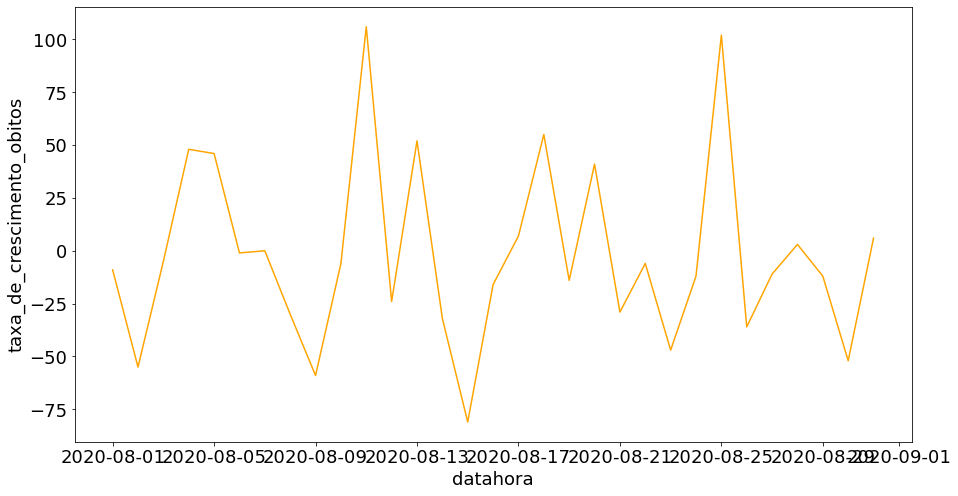

In [44]:
sns.lineplot(x = 'datahora', y = 'taxa_de_crescimento_casos', data = dados_202008)
plt.show()
sns.lineplot(x = 'datahora', y = 'taxa_de_crescimento_obitos', data = dados_202008, color = 'orange')
plt.show()

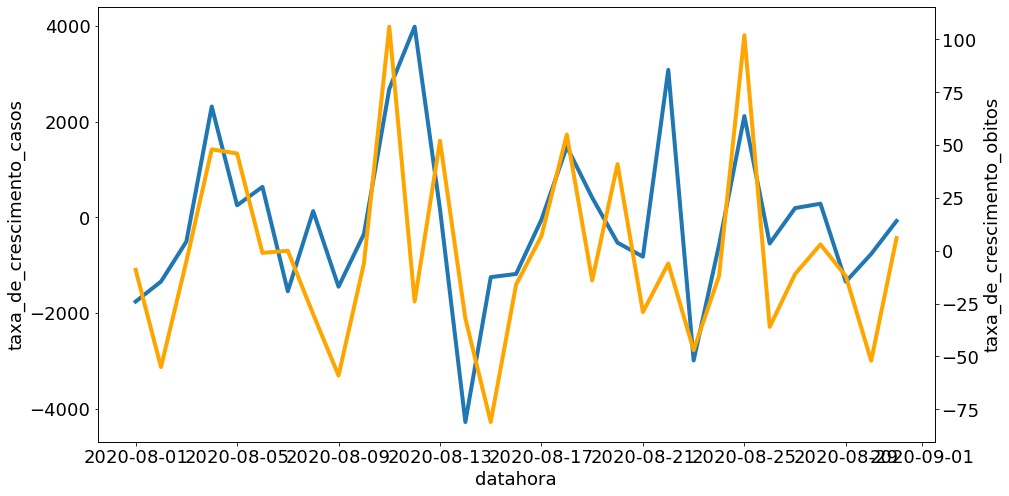

In [41]:
ax1 = sns.lineplot(x = 'datahora', y = 'taxa_de_crescimento_casos', data = dados_202008, linewidth = 4)
ax2 = ax1.twinx()
ax2 = sns.lineplot(x = 'datahora', y = 'taxa_de_crescimento_obitos', data = dados_202008, linewidth = 4, color = 'orange')

O gráfico acima foi feito para tentarmos checar se os picos nos números de casos e no número de óbitos coincidem. Escolhemos o mês de agosto de 2008.

Alguns podem sim coincidir, mas no geral isso não ocorre, pois os dados dos óbitos são inseridos na base de dados em datas diferentes dos dados sobre os casos.

# Desafio 03: Fazer melhorias nos gráficos.

- Adicionar título;
- Adicionar labels;
- Etc.

Feito em alguns gráficos anteriores.

# Desafio 04: Gerar o gráfico da média móvel do número de óbitos e mudar os gráficos de casos para barras.

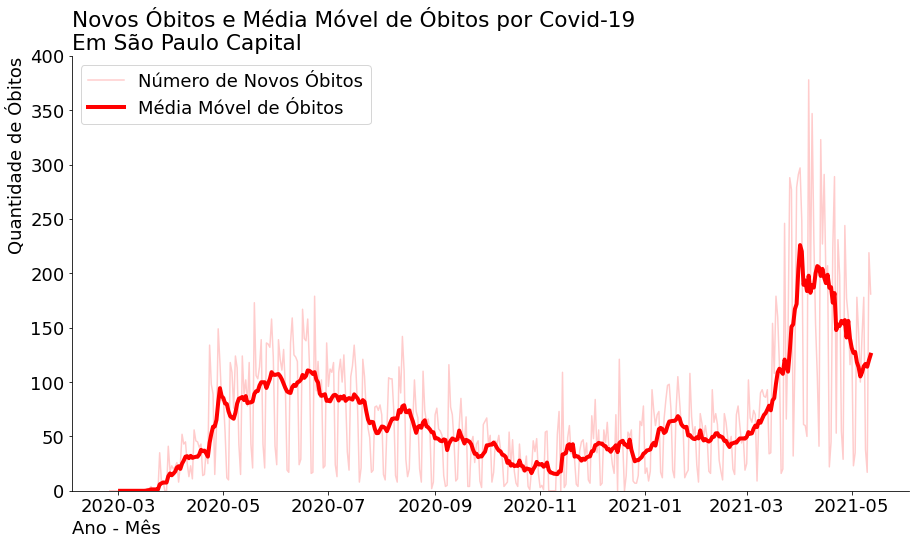

In [66]:
sns.lineplot(x = 'datahora', y = 'obitos_novos', data = dados_sp, alpha = 0.2, linewidth = 1.5, label = 'Número de Novos Óbitos', color = 'red')
sns.lineplot(x = 'datahora', y = 'media_movel_obitos', data = dados_sp, linewidth = 4, label = 'Média Móvel de Óbitos', color = 'red')
plt.title('Novos Óbitos e Média Móvel de Óbitos por Covid-19\nEm São Paulo Capital', loc = 'left')
sns.despine()
plt.xlabel('Ano - Mês', loc = 'left')
plt.ylabel('Quantidade de Óbitos', loc = 'top')
plt.ylim(0, 400)
plt.legend()
plt.show()

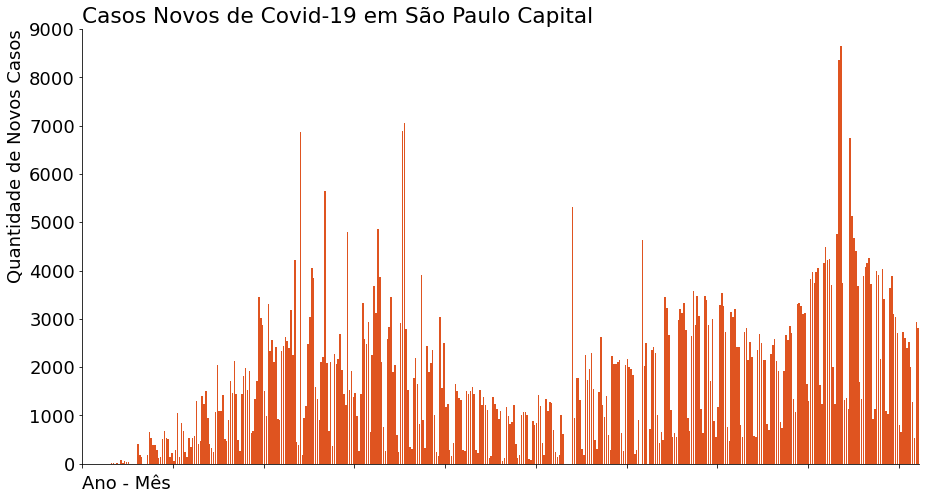

In [96]:
from matplotlib.dates import DateFormatter


ax = sns.barplot(x = 'datahora', y = 'casos_novos', data = dados_sp, color = 'orangered')
plt.title('Casos Novos de Covid-19 em São Paulo Capital', loc = 'left')
plt.xlabel('Ano - Mês', loc = 'left')
plt.ylabel('Quantidade de Novos Casos', loc = 'top')
sns.despine()
plt.xticks(rotation = 0)
#date_form = DateFormatter("%y-%m")
plt.ylim(0, 9000)
#plt.xlim("2020-02-25", "2021-05-31")
#ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(ticker.IndexLocator(base = 48, offset = 0))
plt.show()

# Desafio 05: Mover o número de óbitos alguns dias para verificar o resultado no gráfico.

Para isso utilizaremos a função ```shift``` do ```pandas``` que já realiza essa operação automaticamente.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [98]:
dados_sp['obitos_7_dias_antes'] = dados_sp['obitos_novos'].shift(-7) 

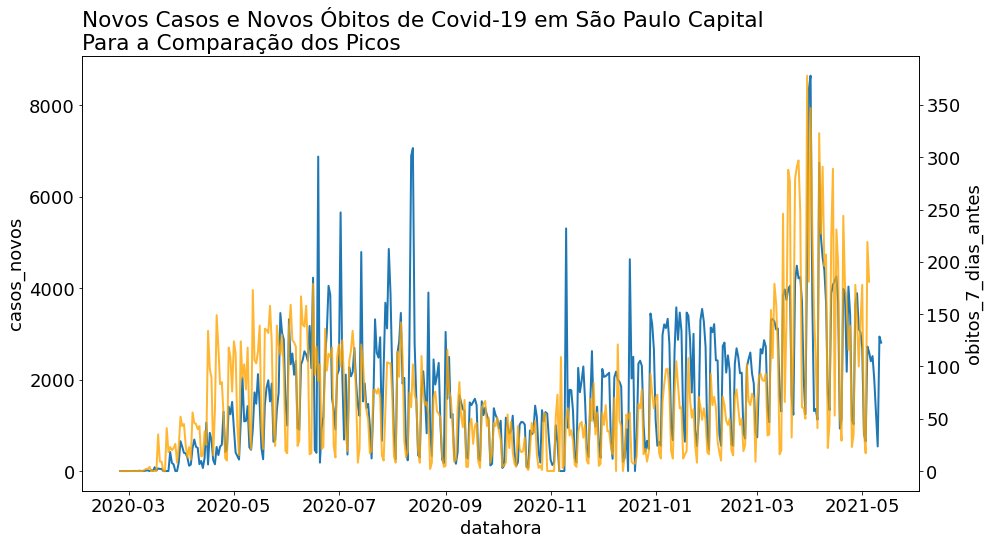

In [110]:
ax1 = sns.lineplot(x = 'datahora', y = 'casos_novos', data = dados_sp, linewidth = 2)
ax2 = ax1.twinx()
ax2 = sns.lineplot(x = 'datahora', y = 'obitos_7_dias_antes', data = dados_sp, color = 'orange', linewidth = 2, alpha = 0.8)
plt.title('Novos Casos e Novos Óbitos de Covid-19 em São Paulo Capital\nPara a Comparação dos Picos', loc = 'left')
plt.show()

Aqui os picos ficaram de casos e óbitos ficaram mais próximos.

In [113]:
dados_sp['obitos_6_dias_antes'] = dados_sp['obitos_novos'].shift(-6) 

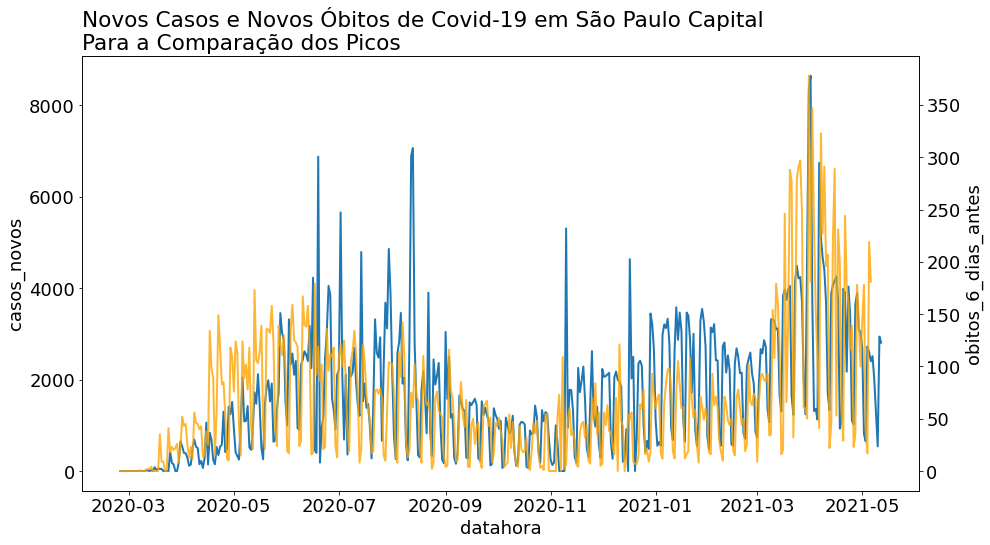

In [114]:
ax1 = sns.lineplot(x = 'datahora', y = 'casos_novos', data = dados_sp, linewidth = 2)
ax2 = ax1.twinx()
ax2 = sns.lineplot(x = 'datahora', y = 'obitos_6_dias_antes', data = dados_sp, color = 'orange', linewidth = 2, alpha = 0.8)
plt.title('Novos Casos e Novos Óbitos de Covid-19 em São Paulo Capital\nPara a Comparação dos Picos', loc = 'left')
plt.show()

Olhando para o maior pico de ambas as linhas, agora eles estão melhor encaixados, após realizarmos um _shift_ de 6 dias no valor de novos óbitos.

# Desafio 06: Função de correlação cruzada dos óbitos e casos.

# Desafio 07: Estudar outros municípios.

In [139]:
# transforma as Series do pandas em arrays do numpy
casos = dados_sp['casos_novos'].to_numpy()
obitos = dados_sp['casos_novos'].to_numpy()

- https://numpy.org/doc/stable/reference/generated/numpy.correlate.html

In [140]:
# calcula a correlação entre os dois arrays
corr_casos_obitos = np.correlate(casos, obitos, 'full')

<AxesSubplot:>

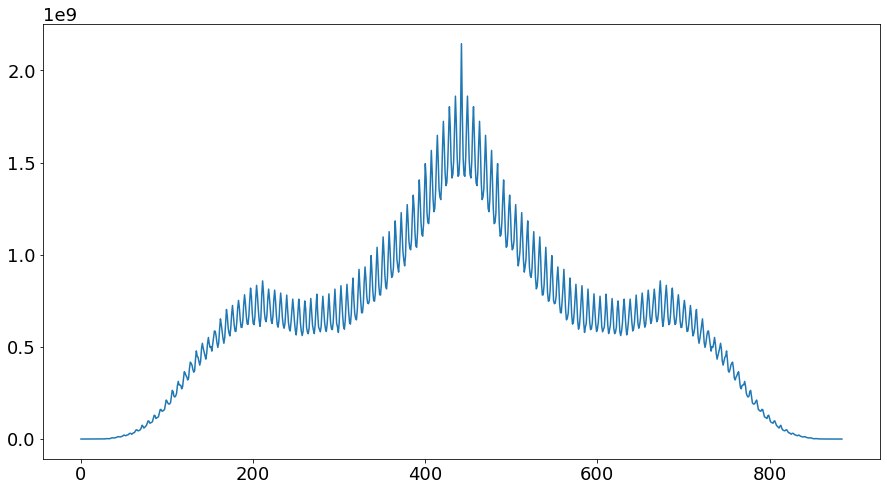

In [141]:
# plota a o resultado
pd.Series(corr_casos_obitos).plot()

O gif abaixo retrata bem o que significa a correlação em função do lag. [Fonte](https://robosub.eecs.wsu.edu/wiki/ee/hydrophones/start)

![](https://robosub.eecs.wsu.edu/wiki/lib/exe/fetch.php?tok=aa8260&media=https%3A%2F%2Fmedia.giphy.com%2Fmedia%2FVVPKOXc6aY1Lq%2Fsource.gif)

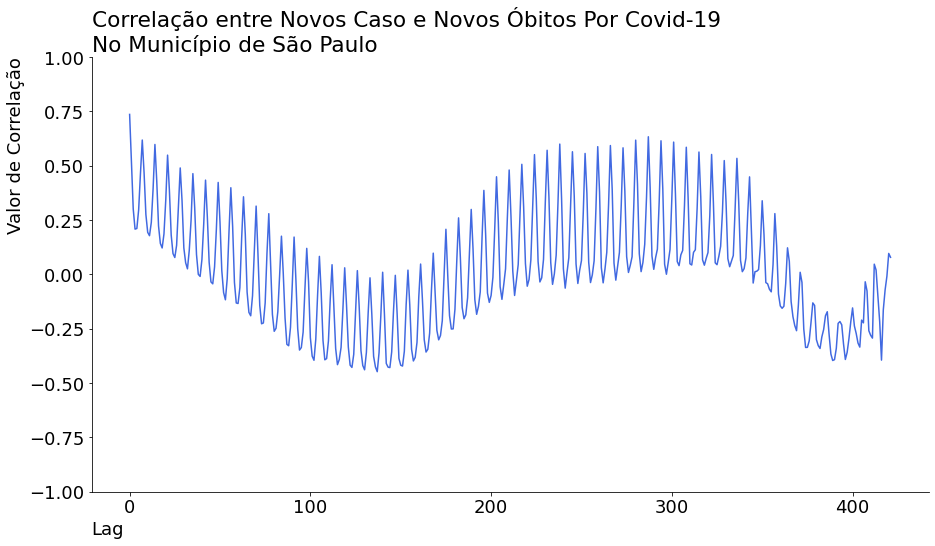

In [160]:
correlacao_obitos_casos = [dados_sp['casos_novos'].corr(dados_sp['obitos_novos'].shift(t)) for t in range(0, len(dados_sp))]
lag = range(0, len(dados_sp))
sns.lineplot(x = lag, y = correlacao_obitos_casos, color = 'royalblue')
plt.ylim(-1, 1)
plt.title('Correlação entre Novos Caso e Novos Óbitos Por Covid-19\nNo Município de São Paulo', loc = 'left')
plt.xlabel('Lag', loc = 'left')
plt.ylabel('Valor de Correlação', loc = 'top')
sns.despine()
plt.show()

O gráfico acima é basicamente a "metade" do gráfico anterior a ele.

**Qual valor nos deu a maior correlação?**

In [155]:
# iremos descartar o valor 0, pois ele é o máximo
correlacao_obitos_casos.index(max(correlacao_obitos_casos[1:]))

287